In [8]:
from langgraph.graph import StateGraph, START, END
from typing import  TypedDict

In [13]:
# Define State
class BMIState(TypedDict):

    weight_kg : float
    height_m : float
    bmi : float
    category : str

In [7]:
def calculate_bmi(state : BMIState) -> BMIState:

    weight = state['weight_kg']
    height = state['height_m']
    
    bmi = weight / (height ** 2)
    
    state['bmi'] = round(bmi,2)
    
    return state

In [14]:
def label_bmi(state : BMIState) -> BMIState:

    bmi = state["bmi"]

    if bmi < 18.5:
        state["category"] = "Underweight"
    elif 18.5 <= bmi < 25:
        state["category"] = "Normal weight"
    elif 25 <= bmi < 30:
        state["category"] = "Overweight"
    else:
        state["category"] = "Obesity"

    return state

In [15]:
# Define your Graph
graph = StateGraph(BMIState)

# Add nodes to your graph
graph.add_node("Calculate_bmi", calculate_bmi)
graph.add_node("label_bmi", label_bmi)

# add edges to your graph
graph.add_edge(START, "Calculate_bmi")
graph.add_edge('Calculate_bmi', 'label_bmi')
graph.add_edge("label_bmi", END)

# compile the graph
workflow = graph.compile()


In [16]:
# Execute the graph
intial_state = {
    "weight_kg": 70,
    "height_m": 1.75
}

final_state = workflow.invoke(intial_state)

print(final_state)

{'weight_kg': 70, 'height_m': 1.75, 'bmi': 22.86, 'category': 'Normal weight'}


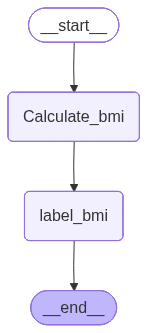

In [17]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())